In [106]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras

import matplotlib.pyplot as plt
import cv2

In [114]:
model = tf.keras.models.load_model('savedModels/test_model.keras')

In [108]:
numbers = np.zeros((10,28,28))
labels = [0,1,2,3,4,5,6,7,8,9]
for i in range(10):
    img = cv2.imread(f"numbers2/{i}.jpg",cv2.IMREAD_GRAYSCALE) #Read the image as a grayscale
    img = cv2.resize(img,(28,28), interpolation=cv2.INTER_AREA)
    img = (255-img)/255.0
    numbers[i]=img


In [109]:
def show_img(i, data, labels):
    '''
    Show image at index i of array of images
    '''
    plt.imshow((data)[i], cmap=plt.cm.binary)
    
    predA = (model.predict(data)[i])
    pred = np.argmax(predA)
    
    if (pred == labels[i]):
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel(f"Pred:{pred} (Actual:{labels[i]})", color=color)

In [110]:
def plot_graph(num_rows, num_cols, data, labels):
  '''
  Plot a graph of num_rows x num_cols with image and prediction.
  xlabel green for correct predictions, red for incorrect
  
  Parameters
  ----------
  num_rows: (int) number of rows
  num_cols: (int) number of columns
  data: NDArray(float64) Array of images
  label: list[int] List of labels corresponding to images
  '''
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    show_img(i,data,labels)
  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


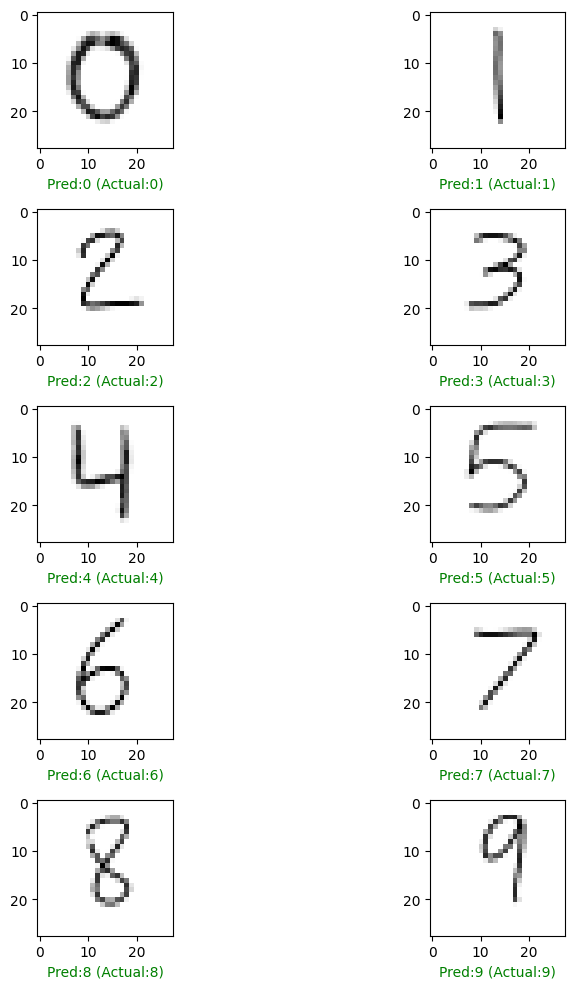

In [111]:
plot_graph(5,2,numbers,labels)

In [112]:
def predict(num):
    '''
    Predict number within image
    Show image with xlabel of prediction and certainty
    
    Parameters
    ----------
    
    num: Greyscale ndarray of the image
    
    cv2.imread("{FILENAME}",cv2.IMREAD_GRAYSCALE) to read greyscale image to parse into function
    
    
    Returns
    ----------
    pred: (np int64) Predicted number
    
    Certainty (np float32) Certainty of prediction to 2dp 
    
    '''
    num = cv2.resize(num,(28,28), interpolation=cv2.INTER_AREA) #Compress image to MNIST format, INTER_AREA best interpolation for images, provides most accuarate representation
    
    #If White number on black background -> flip colors
    if (np.mean(num) >= 123):
        num = (255-num)
    
    num = num/255.0 #Normailse greyscale values 0 to 1

    plt.imshow(num, cmap=plt.cm.binary) #Show image with greyscale colormap
    
    num = np.reshape(num,(1,28,28)) #model.Predict requires 3D np array (1,28,28)
    
    predA = (model.predict(num))    #Predict probability values
    pred = np.argmax(predA)         #Select highest probability value label
    certainty = round((np.max(predA)*100),2)    #Select certainty to 2dp
    
    #xlabel imshow with prediction and certainty to 2dp
    plt.xlabel(f"Prediction: {pred}, Certainty: {format(certainty, '.2f')}")
    
    return(pred,certainty)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


(np.int64(8), np.float32(99.81))

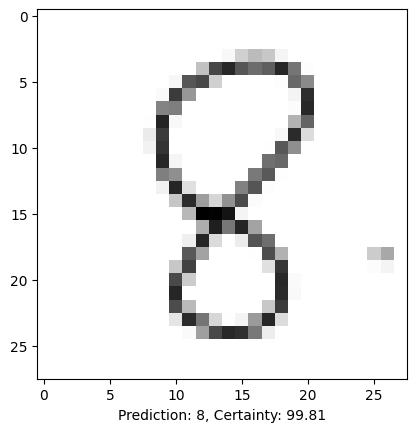

In [113]:
num = cv2.imread("numbers/eightdot.jpg",cv2.IMREAD_GRAYSCALE) #Read the image as a grayscale
predict(num)
#print(predict.__doc__)
#help(predict)
